# Task

The task is to make a figure that shows best how different or how similar all of those amplifiers are. You can use single plots, plots with multiple panels, color, linestyle, whatever you like. The task is to provide the reader, at first view, with an estimate how uniform (or non-uniform) the production of the amplifiers was. 

You can also choose to manipulate the data, by for example calculating the mean or other statsitical quantities. Whatever seems to make the most sense to you. 
If you have a different idea, but cannot implement it in programming, you can also describe what you would have done in your presentation. 


# Imports

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

In [6]:
file_path = "Data/Chan_1.csv"
df = pd.read_csv(file_path, sep=",", skiprows=6, header=0)
df

,Freq(Hz),S11(MAG),S11(DEG),S12(MAG),S12(DEG),S21(MAG),S21(DEG),S22(MAG),S22(DEG)
0,9.000000e+03,0.999245,0.535838,0.002331,92.284630,0.003719,-39.695724,0.996680,0.781170
1,5.089955e+05,0.999037,-5.822672,0.003890,-107.391880,0.015916,-56.302948,0.991757,-8.780738
2,1.008991e+06,0.996563,-11.250418,0.003411,-22.969645,0.016328,-15.146336,0.974487,-15.839484
3,1.508986e+06,0.993843,-16.695112,0.001483,24.424435,0.034674,25.232454,0.955993,-23.323471
4,2.008982e+06,1.000540,-22.069056,0.001281,142.423980,0.023284,130.255750,0.991752,-30.921526
...,...,...,...,...,...,...,...,...,...
1996,9.980000e+08,0.168285,-178.949140,0.000568,-7.790637,0.033617,53.922894,0.141843,106.079220
1997,9.985000e+08,0.170672,178.718290,0.001131,-94.291031,0.010134,59.770569,0.178596,116.539320
1998,9.990000e+08,0.166767,176.007030,0.001295,-10.292303,0.083128,112.347100,0.177550,106.576320
1999,9.995000e+08,0.164808,172.567950,0.000719,-157.417400,0.018789,63.150906,0.147692,106.178290


In [7]:
all_files = os.listdir('Data')
print("File names:\n" + str(all_files))
# exclude hidden files (starting with .)
all_files = [file for file in all_files if not file.startswith('.')]

# create dict of all dataframes with key = number of file
df_dict = {}
col_names = []
freq_list = []
for index, file in enumerate(all_files):
   df = pd.read_csv(os.path.join('Data', file), sep=",", skiprows=6, header=0, parse_dates=True)
   # extract int from filename between "_" and "."
   num = int(file.split("_")[1].split(".")[0])
   df_dict[num] = df
   # check if all files have same header and the same first column entries
   if index == 0:
      col_names = df.columns.values.tolist()
      print("Column names:\n" + str(col_names))
      freq_list = df[col_names[0]].values.tolist()
   else:
      if col_names != df.columns.values.tolist():
         print(file + " has different header than first file!")
      if freq_list != df[col_names[0]].values.tolist():
         print(file + " has different first column than first file!")

amplifier_nums = np.array(list(df_dict.keys()), dtype=int)
print("Amplifier numbers:\n" + str(amplifier_nums))

File names:
['Chan_1.csv', 'Chan_2.csv', 'Chan_3.csv', 'Chan_4.csv', 'Chan_5.csv', 'Chan_15.csv', 'Chan_14.csv', 'Chan_13.csv', 'Chan_12.csv', 'Chan_11.csv', '.~lock.Chan_1.csv#']
Column names:
['Freq(Hz)', 'S11(MAG)', 'S11(DEG)', 'S12(MAG)', 'S12(DEG)', 'S21(MAG)', 'S21(DEG)', 'S22(MAG)', 'S22(DEG)']
Amplifier numbers:
[ 1  2  3  4  5 15 14 13 12 11]


# Investigate S21 (complex linear gain)

Transmission Parameters: These parameters indicate how much of the input signal is transmitted to the output of the device.

S21 represents the transmission gain (or loss) from port 1 to port 2, while S12 represents the transmission gain (or loss) from port 2 to port 1.

These values define the device's ability to transfer signals without significant loss or distortion.

## plot all S21(MAG) data

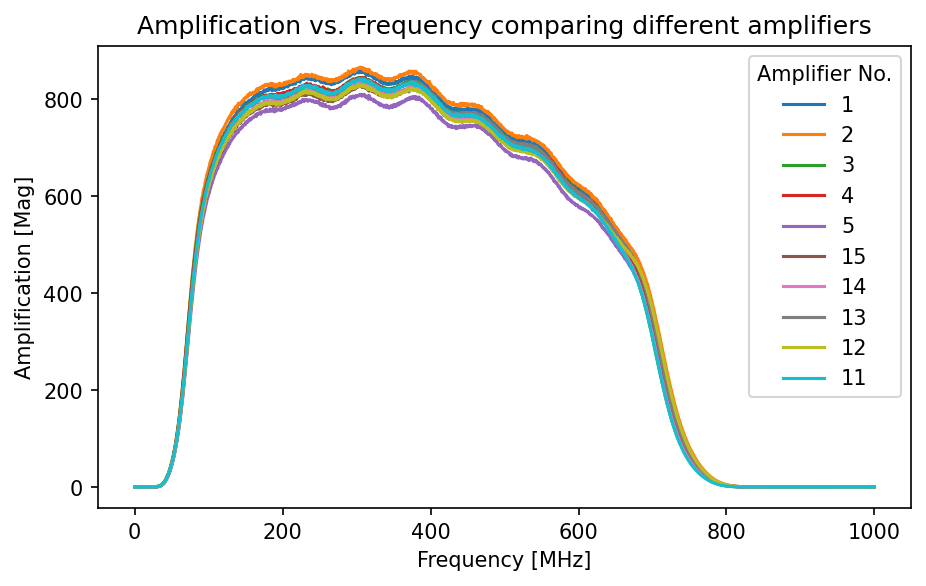

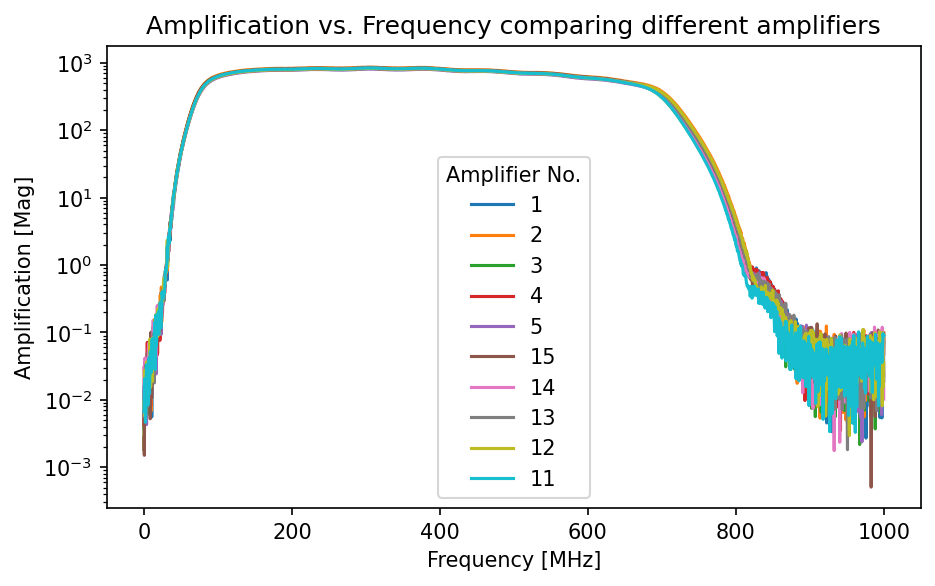

In [8]:
# linear scale
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)
plt.title("Amplification vs. Frequency comparing different amplifiers")
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Amplification [Mag]')
for num in amplifier_nums:
   amp = df_dict[num][col_names[5]]
   freq = np.array(freq_list) / 1e6
   ax.plot(freq, amp, label=num)
ax.legend(title="Amplifier No.")
plt.show()

# log scale
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)
plt.title("Amplification vs. Frequency comparing different amplifiers")
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Amplification [Mag]')
for num in amplifier_nums:
   amp = df_dict[num][col_names[5]]
   freq = np.array(freq_list) / 1e6
   ax.plot(freq, amp, label=num)
ax.legend(title="Amplifier No.")
plt.semilogy()
plt.show()

## Mean amplification across all devices

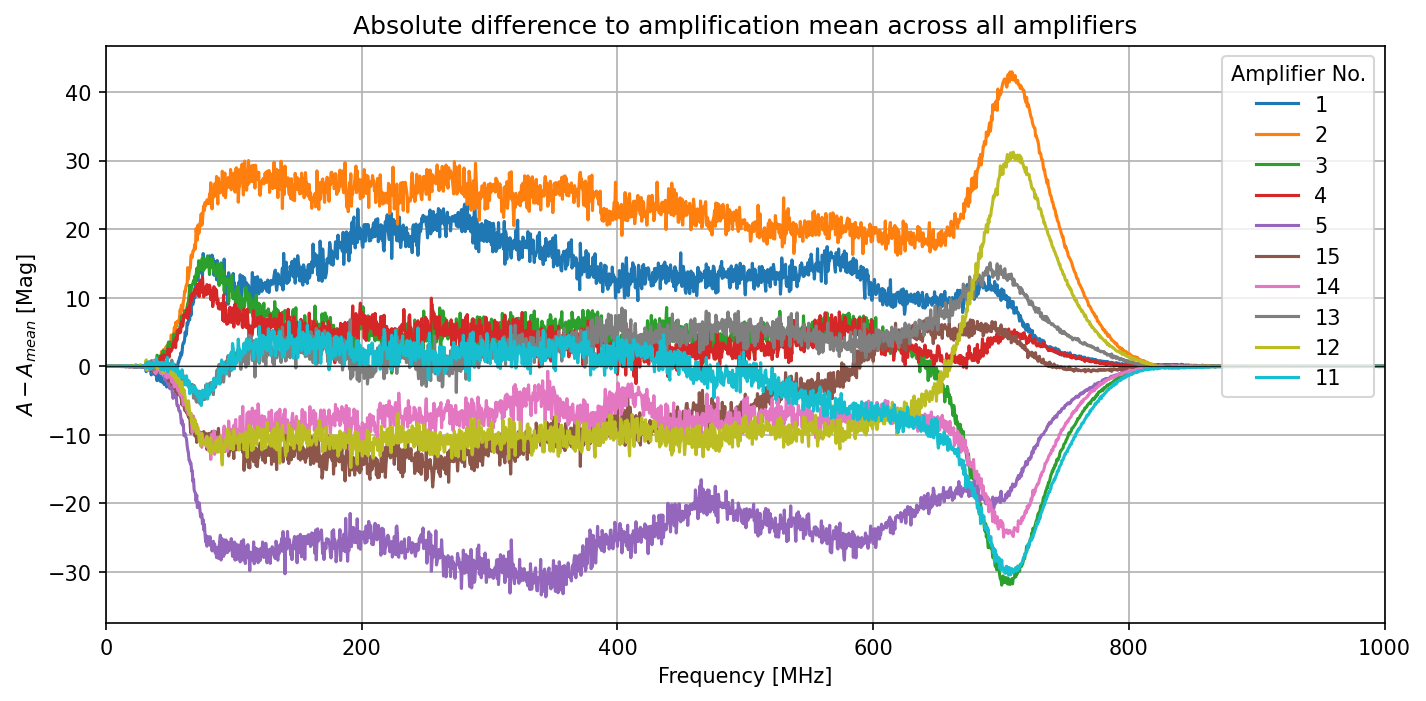

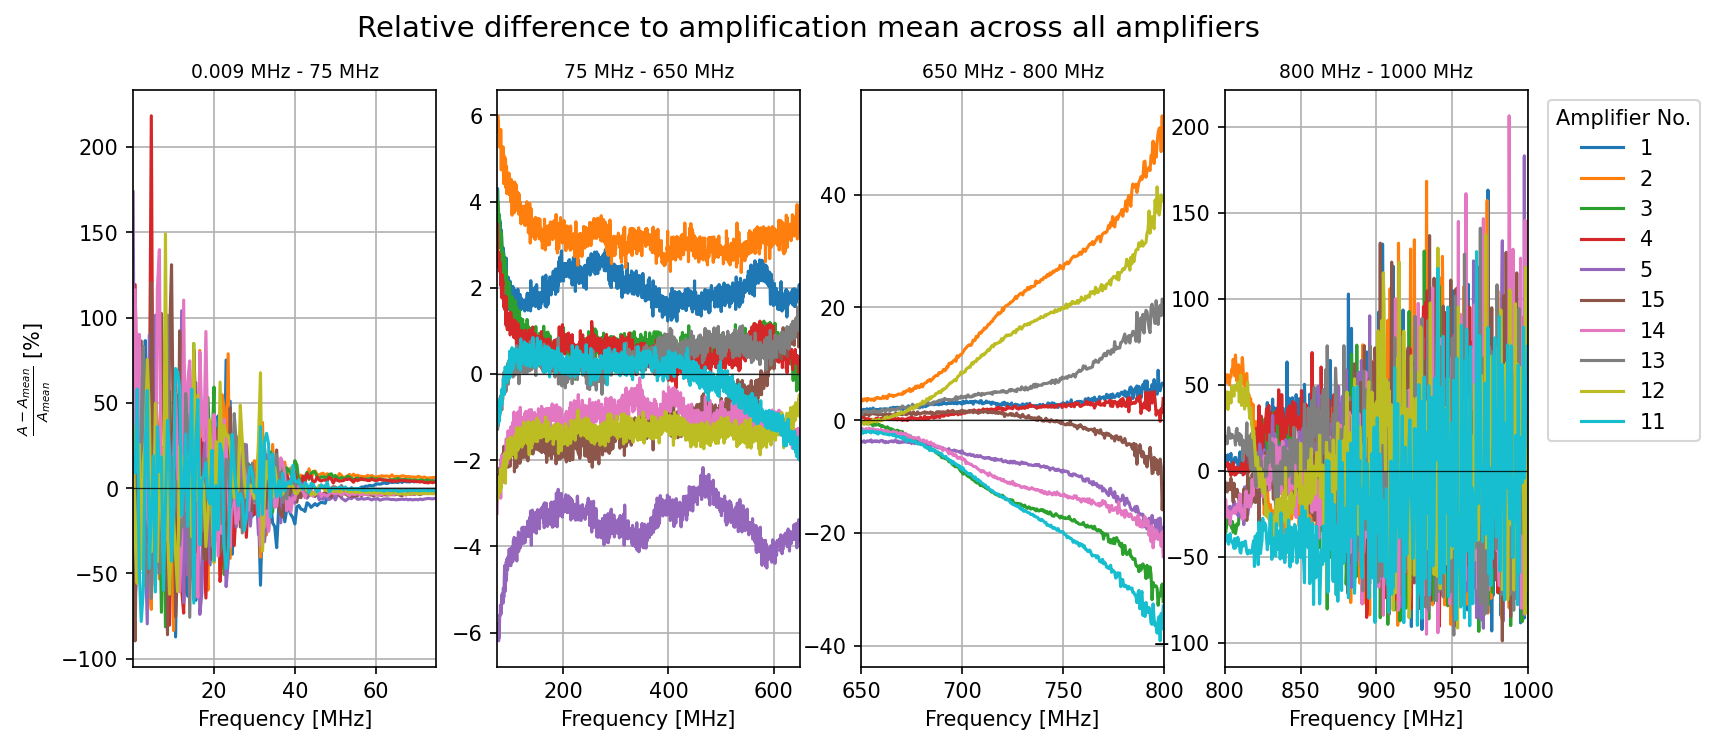

In [9]:
# mean amplification per frequency across all amplifiers
mean_amp = np.zeros(len(freq_list))
for num in amplifier_nums:
   mean_amp += df_dict[num][col_names[5]].values
mean_amp /= len(amplifier_nums)


# plot abs difference to mean
fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
plt.title("Absolute difference to amplification mean across all amplifiers")
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('$A-A_{mean}$ [Mag]')
for num in amplifier_nums:
   amp = df_dict[num][col_names[5]]
   dist_to_mean = amp - mean_amp
   freq = np.array(freq_list) / 1e6
   ax.plot(freq, dist_to_mean, label=num)
ax.legend(title="Amplifier No.", loc='upper right')
plt.xlim([0, 1000])
plt.grid()
# black line at y=0
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.6, alpha=0.8)
plt.show()


######################################################################################################## 


# plot relative difference to mean in different frequency ranges
min_freq_mhz, max_freq_mhz = np.min(freq_list) / 1e6, np.max(freq_list) / 1e6
freq_ranges_mhz = [min_freq_mhz, 75, 650, 800, int(max_freq_mhz)]
nrows = len(freq_ranges_mhz) - 1

fig, ax = plt.subplots(ncols=nrows, figsize=(12, 5), dpi=150)
plt.suptitle("Relative difference to amplification mean across all amplifiers", fontsize=14)

for i in range(len(freq_ranges_mhz)-1):
   if i == 0:
      ax[i].set_ylabel('$\\frac{A-A_{mean}}{A_{mean}}$ [%]')
   ax[i].set_xlabel('Frequency [MHz]')
   ax[i].set_title(str(freq_ranges_mhz[i]) + " MHz - " + str(freq_ranges_mhz[i+1]) + " MHz", fontsize=9)
   for num in amplifier_nums:
      amp = df_dict[num][col_names[5]]
      rel_dist_to_mean = (amp - mean_amp) / mean_amp * 100
      freq = np.array(freq_list) / 1e6
      mask = (freq >= freq_ranges_mhz[i]) & (freq < freq_ranges_mhz[i+1])
      ax[i].plot(freq[mask], rel_dist_to_mean[mask], label=num)
   ax[i].grid()
   # black line at y=0
   ax[i].axhline(y=0, color='k', linestyle='-', linewidth=0.6, alpha=0.8)
   ax[i].set_xlim([freq_ranges_mhz[i], freq_ranges_mhz[i+1]])

# plot legend once outside last plot
ax[-1].legend(title="Amplifier No.", bbox_to_anchor=(1.6, 1), loc='upper right')
plt.show()

## Amplification uncertainty

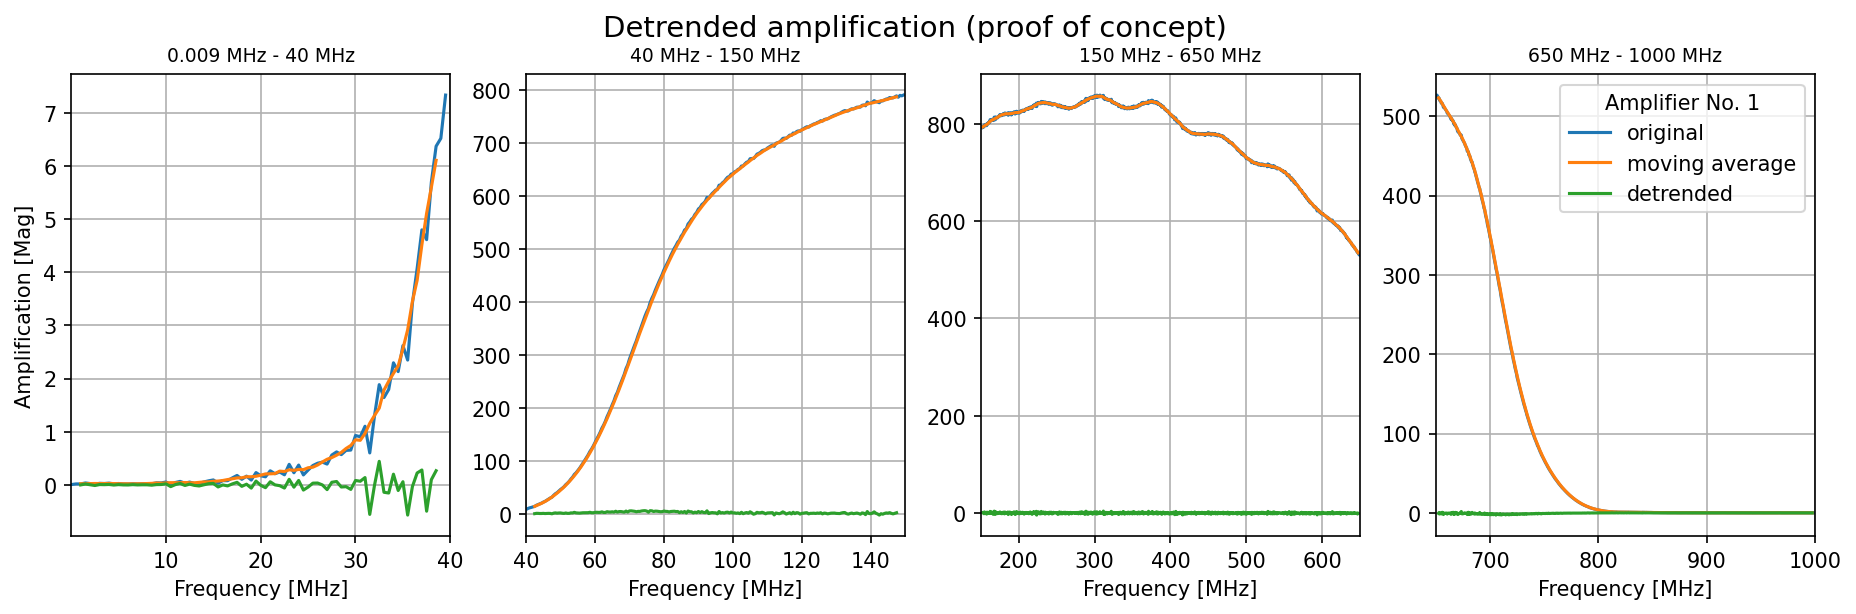

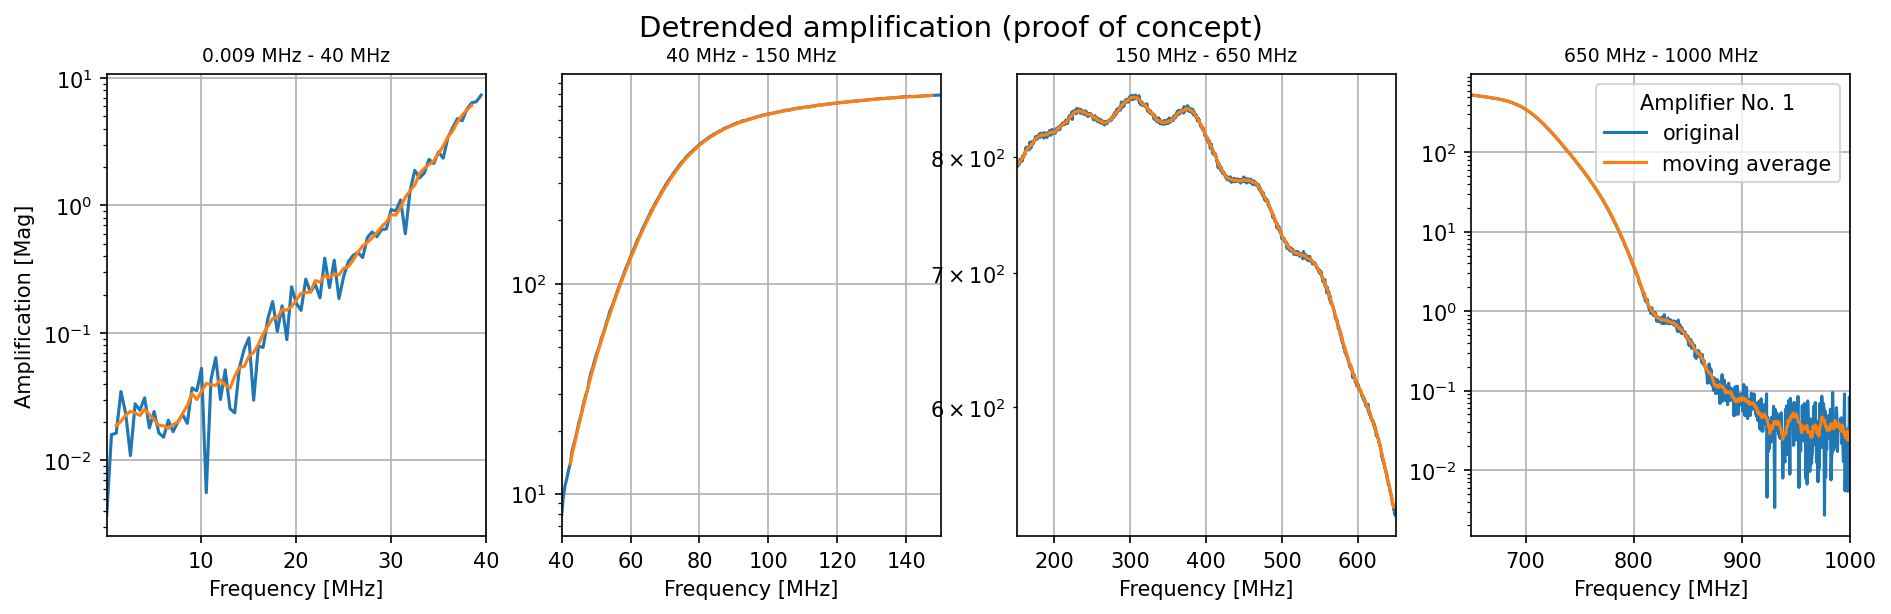

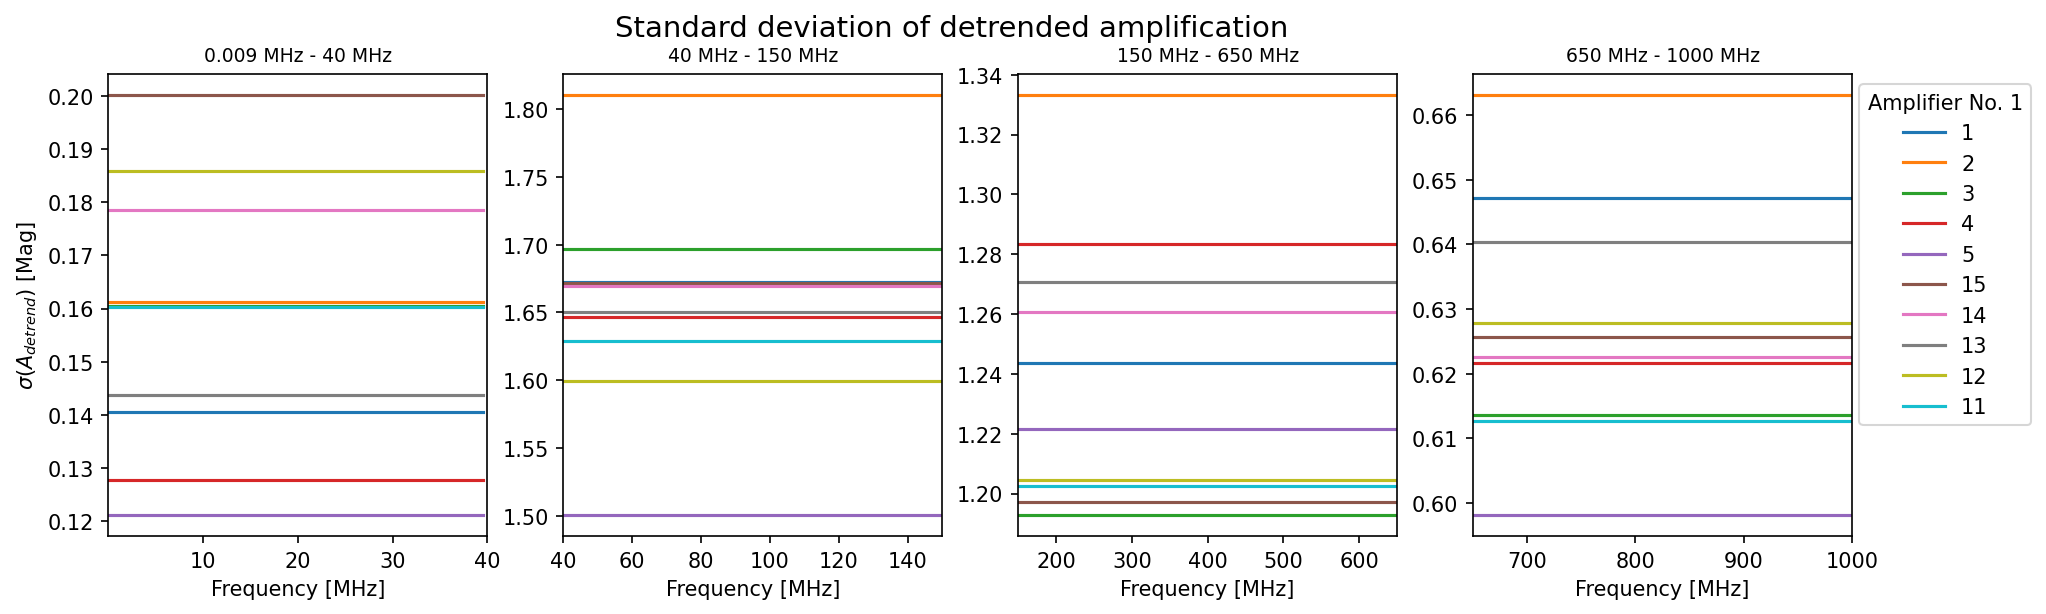

In [10]:
# calculate standard deviation of detrended amplification for each amplifier in different frequency ranges

min_freq_mhz, max_freq_mhz = np.min(freq_list) / 1e6, np.max(freq_list) / 1e6
freq_ranges_mhz = [min_freq_mhz, 40, 150, 650, int(max_freq_mhz)]
nrows = len(freq_ranges_mhz) - 1
roll_windows = [5, 10, 10, 10]


######################################################################################################## 
# proof of concept for detrending

fig, ax = plt.subplots(ncols=nrows, figsize=(15, 4), dpi=150)
plt.suptitle("Detrended amplification (proof of concept)", fontsize=14)

for i in range(len(freq_ranges_mhz)-1):
    if i == 0:
      ax[i].set_ylabel('Amplification [Mag]')
    ax[i].set_xlabel('Frequency [MHz]')
    ax[i].set_title(str(freq_ranges_mhz[i]) + " MHz - " + str(freq_ranges_mhz[i+1]) + " MHz", fontsize=9)
    for num in amplifier_nums:
        freq = np.array(freq_list) / 1e6
        mask = (freq >= freq_ranges_mhz[i]) & (freq < freq_ranges_mhz[i+1])
        amp = df_dict[num][col_names[5]]
        # mask range
        amp = amp[mask]
        freq = freq[mask]
        # detrend
        amp_rolling_mean = amp.rolling(window=roll_windows[i], center=True).mean()
        amp_detrended = amp - amp_rolling_mean
        if num == 1:
            #ax[i].plot(freq, amp_detrended, label=num)
            ax[i].plot(freq, amp, label="original")
            ax[i].plot(freq, amp_rolling_mean, label="moving average")
            ax[i].plot(freq, amp_detrended, label="detrended")

        else:
            continue
    ax[i].grid()
    ax[i].set_xlim([freq_ranges_mhz[i], freq_ranges_mhz[i+1]])

# plot legend once outside last plot
ax[-1].legend(title="Amplifier No. 1", loc='upper right')
plt.show()

########################################################################################################
# proof of concept for detrending (log scale)

fig, ax = plt.subplots(ncols=nrows, figsize=(15, 4), dpi=150)
plt.suptitle("Detrended amplification (proof of concept)", fontsize=14)

for i in range(len(freq_ranges_mhz)-1):
    if i == 0:
      ax[i].set_ylabel('Amplification [Mag]')
    ax[i].set_xlabel('Frequency [MHz]')
    ax[i].set_title(str(freq_ranges_mhz[i]) + " MHz - " + str(freq_ranges_mhz[i+1]) + " MHz", fontsize=9)
    for num in amplifier_nums:
        freq = np.array(freq_list) / 1e6
        mask = (freq >= freq_ranges_mhz[i]) & (freq < freq_ranges_mhz[i+1])
        amp = df_dict[num][col_names[5]]
        # mask range
        amp = amp[mask]
        freq = freq[mask]
        # detrend
        amp_rolling_mean = amp.rolling(window=roll_windows[i], center=True).mean()
        amp_detrended = amp - amp_rolling_mean
        if num == 1:
            #ax[i].plot(freq, amp_detrended, label=num)
            ax[i].plot(freq, amp, label="original")
            ax[i].plot(freq, amp_rolling_mean, label="moving average")

        else:
            continue
    ax[i].semilogy()
    ax[i].grid()
    ax[i].set_xlim([freq_ranges_mhz[i], freq_ranges_mhz[i+1]])


# plot legend once outside last plot
ax[-1].legend(title="Amplifier No. 1", loc='upper right')
plt.show()

######################################################################################################## 
# standard deviation of detrended amplification for each amplifier in three different frequency ranges

fig, ax = plt.subplots(ncols=nrows, figsize=(15, 4), dpi=150)
plt.suptitle("Standard deviation of detrended amplification", fontsize=14)

for i in range(len(freq_ranges_mhz)-1):
    if i == 0:
      ax[i].set_ylabel('$\\sigma(A_{detrend})$ [Mag]')
    ax[i].set_xlabel('Frequency [MHz]')
    ax[i].set_title(str(freq_ranges_mhz[i]) + " MHz - " + str(freq_ranges_mhz[i+1]) + " MHz", fontsize=9)
    for num in amplifier_nums:
        freq = np.array(freq_list) / 1e6
        mask = (freq >= freq_ranges_mhz[i]) & (freq < freq_ranges_mhz[i+1])
        amp = df_dict[num][col_names[5]]
        # mask range
        amp = amp[mask]
        freq = freq[mask]
        # detrend
        amp_rolling_mean = amp.rolling(window=roll_windows[i], center=True).mean()
        amp_detrended = amp - amp_rolling_mean
        # calculate standard deviation
        amp_std = np.std(amp_detrended) * np.ones(len(freq))
        ax[i].plot(freq, amp_std, label=num)
    ax[i].set_xlim([freq_ranges_mhz[i], freq_ranges_mhz[i+1]])
# plot legend once outside last plot
ax[-1].legend(title="Amplifier No. 1", bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()

## plot all S21(DEG) data

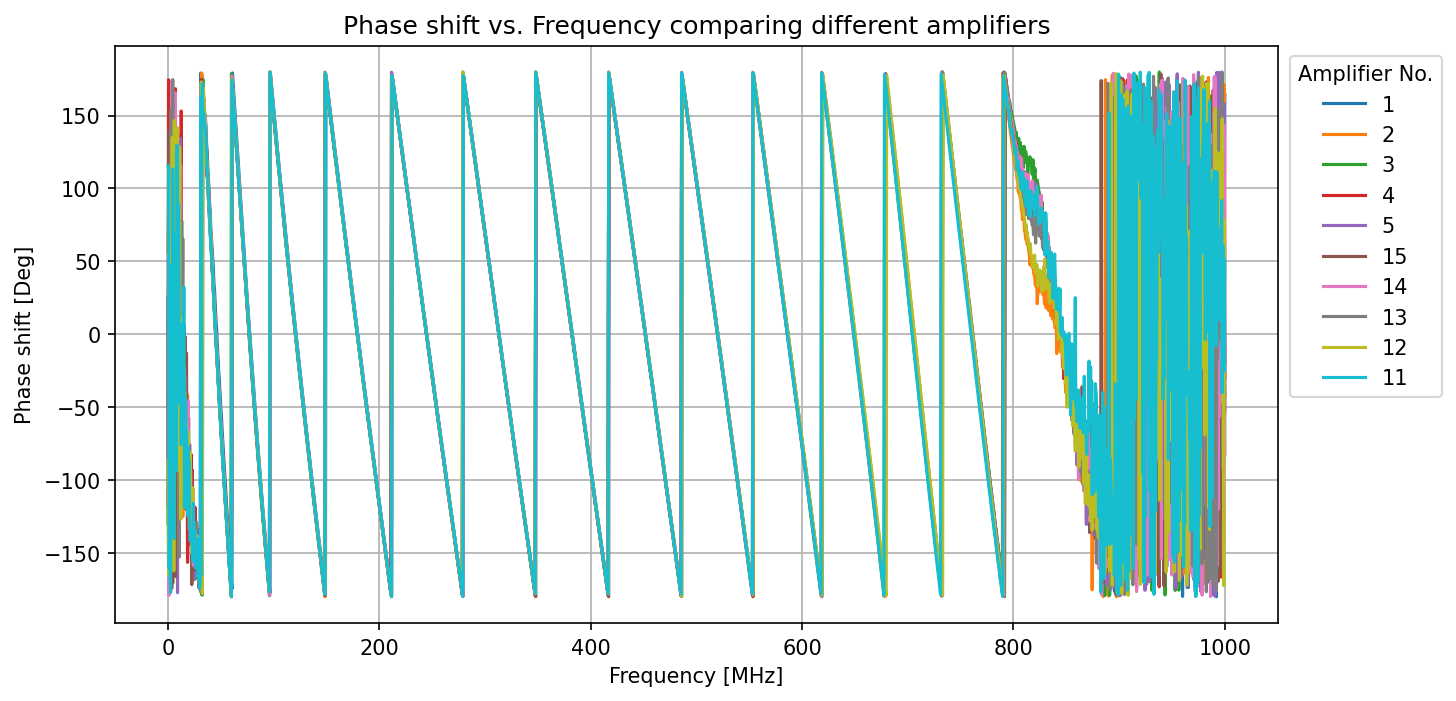

In [11]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
plt.title("Phase shift vs. Frequency comparing different amplifiers")
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Phase shift [Deg]')
for num in amplifier_nums:
   phase = df_dict[num][col_names[6]]
   freq = np.array(freq_list) / 1e6
   ax.plot(freq, phase, label=num)
ax.legend(title="Amplifier No.", bbox_to_anchor=(1.15, 1), loc='upper right')
plt.grid()
plt.show()